In [1]:
#packages for Model
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D,AveragePooling2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Activation,Flatten,Dropout,Dense
from keras import backend as K

Using TensorFlow backend.


In [2]:
#packages for training
import matplotlib
matplotlib.use("Agg")
from keras.preprocessing.image import ImageDataGenerator #数据扩张
from keras import optimizers #优化器
#from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import shutil

In [4]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',
                 input_shape=(150,150,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
from keras.optimizers import Adam
EPOCHS=30 #网络迭代次数
INIT_LR=1e-4 #Adam的初始学习率
optimizer=Adam(lr=INIT_LR,beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',metrics=['acc'],optimizer=optimizer)

In [6]:
train_dir='newdataset/train2'
val_dir='newdataset/validation2'
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=10,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,
                       horizontal_flip=True,fill_mode="nearest")#由于是街景，不能变动太多
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=64,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=64,class_mode='binary')

Found 2247 images belonging to 2 classes.
Found 615 images belonging to 2 classes.


In [7]:
from PIL import Image
history=model.fit_generator(train_generator,steps_per_epoch=20,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
14/20 [====================>.........] - ETA: 48s - loss: 0.7066 - acc: 0.6591

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


20/20 [==============================] - 341s 17s/step - loss: 0.6613 - acc: 0.6780 - val_loss: 0.6158 - val_acc: 0.6488
Epoch 2/50
20/20 [==============================] - 362s 18s/step - loss: 0.5607 - acc: 0.7094 - val_loss: 0.5888 - val_acc: 0.6699
Epoch 3/50
20/20 [==============================] - 332s 17s/step - loss: 0.5250 - acc: 0.7438 - val_loss: 0.6155 - val_acc: 0.6764
Epoch 4/50
20/20 [==============================] - 324s 16s/step - loss: 0.5409 - acc: 0.7356 - val_loss: 0.6731 - val_acc: 0.6537
Epoch 5/50
20/20 [==============================] - 653s 33s/step - loss: 0.5134 - acc: 0.7405 - val_loss: 0.6067 - val_acc: 0.6748
Epoch 6/50
20/20 [==============================] - 328s 16s/step - loss: 0.4814 - acc: 0.7695 - val_loss: 0.6312 - val_acc: 0.6862
Epoch 7/50
20/20 [==============================] - 321s 16s/step - loss: 0.4890 - acc: 0.7653 - val_loss: 0.5325 - val_acc: 0.7382
Epoch 8/50
20/20 [==============================] - 321s 16s/step - loss: 0.4793 - acc:

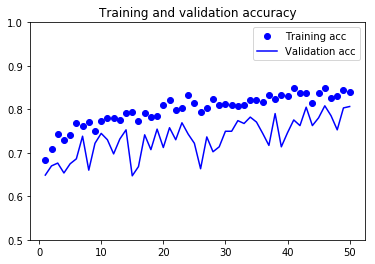

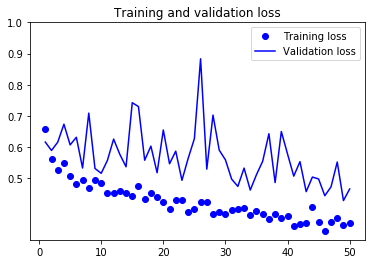

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
plt.legend()
plt.figure()

plt.show()
plt.savefig('spacesyntax1.jpg')

In [9]:
model.save('spacesyntax1.ckpt')

In [1]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='ss1.png', show_shapes=True)

Using TensorFlow backend.


NameError: name 'model' is not defined